# STA 141B: Homework 3
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Samuel

Last Name: Kadin

Student ID: 913351901

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Fruits and Veggies

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [471]:
import pandas as pd
import os as os
import numpy as np
#print(os.getcwd())


def read_data(Type):
    """Function reads the excel file and strips out "Fresh" rows:
    
    Arguments:
        Type of Food (either Fruit or Vegetable) (str)
        
    Returns:
        pandas.DataFrame of the Fresh rows (pd.DataFrame)
    """
    #Sets the list directory in the the correct folder
    
    osd = os.listdir("assignment3_data" + "/" + Type)
    
    #Columns that I want (will be used later in the function)
    
    columns = ["Form","Price Per Pound","Per Pound","Yield","Pounds Per Cup","Pounds","Price Per Cup"]
    columns_wanted = ["Type","Food","Form","Price Per Pound","Yield","Pounds Per Cup","Price Per Cup"]
    ret_df = pd.DataFrame(columns = columns)
    
    #For loop that strips the rows that have Fresh for the Form column
    for i in osd:
        x = pd.read_excel("assignment3_data/" + Type + "/" + i, header = None)
        fruit, _ = i.split(".")
        x = x.iloc[:,:7]
        x.columns = columns
        x = x[x["Form"].str.startswith("Fresh") == True]
        x.insert(0, "Food",fruit)
        x.insert(0,"Type",Type)
        ret_df = ret_df.append(x)
        
    ret_df = ret_df.drop(["Per Pound","Pounds"], axis = 1)
    ret_df = ret_df.reset_index(drop = False)
    #reindexing with the columns in the order that I want
    
    ret_df = ret_df.reindex(columns = columns_wanted)
    
    return(ret_df)

In [472]:
fruit = read_data("fruit")
fruit

,Type,Food,Form,Price Per Pound,Yield,Pounds Per Cup,Price Per Cup
0,fruit,cherries,Fresh1,3.59299,0.92,0.341717,1.33455
1,fruit,tangerines,Fresh1,1.37796,0.74,0.407855,0.759471
2,fruit,oranges,Fresh1,1.03517,0.73,0.407855,0.578357
3,fruit,blackberries,Fresh1,5.77471,0.96,0.31967,1.92292
4,fruit,apricots,Fresh1,3.04007,0.93,0.363763,1.1891
5,fruit,papaya,Fresh1,1.29801,0.62,0.308647,0.646174
6,fruit,raspberries,Fresh1,6.97581,0.96,0.31967,2.32287
7,fruit,pineapple,Fresh1,0.627662,0.51,0.363763,0.447686
8,fruit,peaches,Fresh1,1.59119,0.96,0.341717,0.56639
9,fruit,plums,Fresh1,1.82742,0.94,0.363763,0.707176


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [473]:
veg = read_data("vegetables")
veg

,Type,Food,Form,Price Per Pound,Yield,Pounds Per Cup,Price Per Cup
0,vegetables,turnip_greens,Fresh1,2.47175,0.75,0.31967,1.05353
1,vegetables,artichoke,Fresh1,2.21305,0.375309,0.385809,2.27497
2,vegetables,acorn_squash,Fresh1,1.17225,0.458554,0.451948,1.15536
3,vegetables,celery,Fresh1,NaN,NaN,NaN,NaN
4,vegetables,cucumbers,"Fresh, consumed with peel1",1.29593,0.97,0.264555,0.353448
5,vegetables,cucumbers,"Fresh, peeled1",1.29593,0.73,0.264555,0.46965
6,vegetables,kale,Fresh1,2.8073,1.05,0.286601,0.766262
7,vegetables,corn_sweet,Fresh1,2.69062,0.54,0.363763,1.8125
8,vegetables,mushrooms,Fresh1,NaN,NaN,NaN,NaN
9,vegetables,collard_greens,Fresh1,2.63084,1.16,0.286601,0.650001


### Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

No, this is because there are multiple rows for "fresh" types of tomatoes that aren't read in correctly. Yes, several otherse also have this problem, like spinach and carrots for example.

__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [474]:
#drop the rows with NA from veg and append

veg = veg.dropna()
fruit_veg = fruit.append(veg)

In [475]:
#convert the veg and fruit to numeric

veg = fruit.apply(pd.to_numeric, errors = "ignore")
fruit = fruit.apply(pd.to_numeric, errors = "ignore")
fruit_veg = fruit_veg.apply(pd.to_numeric, errors = "ignore")
#fruit_veg.reset_index(drop=True)
fruit_veg.dtypes

Type                object
Food                object
Form                object
Price Per Pound    float64
Yield              float64
Pounds Per Cup     float64
Price Per Cup      float64
dtype: object

In [476]:
fruit_veg

,Type,Food,Form,Price Per Pound,Yield,Pounds Per Cup,Price Per Cup
0,fruit,cherries,Fresh1,3.592990,0.920000,0.341717,1.334548
1,fruit,tangerines,Fresh1,1.377962,0.740000,0.407855,0.759471
2,fruit,oranges,Fresh1,1.035173,0.730000,0.407855,0.578357
3,fruit,blackberries,Fresh1,5.774708,0.960000,0.319670,1.922919
4,fruit,apricots,Fresh1,3.040072,0.930000,0.363763,1.189102
5,fruit,papaya,Fresh1,1.298012,0.620000,0.308647,0.646174
6,fruit,raspberries,Fresh1,6.975811,0.960000,0.319670,2.322874
7,fruit,pineapple,Fresh1,0.627662,0.510000,0.363763,0.447686
8,fruit,peaches,Fresh1,1.591187,0.960000,0.341717,0.566390
9,fruit,plums,Fresh1,1.827416,0.940000,0.363763,0.707176


__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

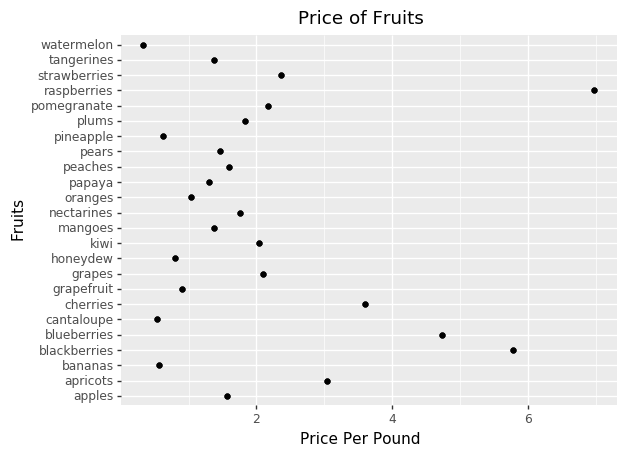

<ggplot: (7545300442)>

In [477]:
%matplotlib inline
import matplotlib
import plotnine as gg
#fruit_veg.head()

fruit_sort = fruit.copy()
fruit_sort['Food'] = pd.Categorical(fruit_sort['Food'], categories=fruit_sort["Price Per Pound"], ordered=True)

# Plotnine dot plot for Fruit and Price per pound

p = gg.ggplot(fruit, gg.aes(x = "Food", y = "Price Per Pound")) + gg.geom_point()
p = p + gg.labs(x = "Fruits", title = "Price of Fruits") + gg.geom_point()
p + gg.theme(axis_text_x = gg.element_text(rotation=0)) + gg.coord_flip()


### What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
Using the above dot plot, we see that the most expensive fruits per pound are raspberries (\$6.97), blackberries (\$5.77), and blueberries (\$4.73).  We could conclude that berries tend to be the most expensive, with strawberries being the exception.  The least expensive fruits are watermelons (\$0.33), bananas (\$0.57), and cantaloupe (\$0.53).  The data is more clustered around lower values (<\$2 per pound), with only the 3 above mentioned berries costing over \$4 per pound.

In [478]:
#Finding the means and medians of the data set

gby_mean = fruit_veg.groupby("Type").mean()
gby_med = fruit_veg.groupby("Type").median()
print("Means:\n",gby_mean,"\n\nMedians:\n",gby_med)

Means:
             Price Per Pound    Yield  Pounds Per Cup  Price Per Cup
Type                                                               
fruit              2.076877  0.77000        0.349984       0.862056
vegetables         1.838701  0.79354        0.329371       0.856272 

Medians:
             Price Per Pound     Yield  Pounds Per Cup  Price Per Cup
Type                                                                
fruit              1.579351  0.830000        0.341717       0.706480
vegetables         1.639477  0.811301        0.319670       0.734926


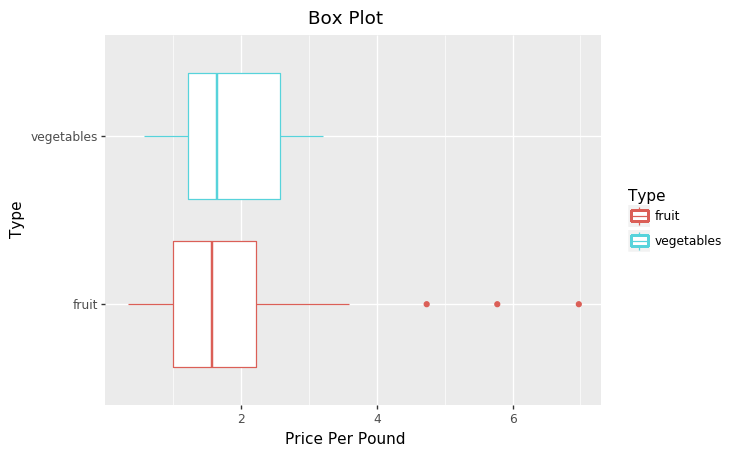

<ggplot: (-9223372029307935330)>

In [479]:
#Boxplot using plotnine comparing fruits and vegetable distributions

p = gg.ggplot(fruit_veg, gg.aes("Type", "Price Per Pound", color = "Type")) + gg.geom_boxplot()
p + gg.labs(title = "Box Plot", x = "Type", y = "Price Per Pound") + gg.coord_flip()

### How do the price distributions compare for fruit and vegetables?
The mean price for fruits is \$2.07, and is \$1.83 for vegetables.  Looking at the box plot, we can see that fruit distribution is skewed right, and has 3 outliers.  They are usurprisingly [raspberries: \$6.97, blackberries: \$5.77 and blueberries: \$4.73].  This skews the means, so that mean fruits are more expensive than vegetables, and suprisingly vegetables have a higher median at \$1.63 compared to fruits which have a median of \$1.58.  Even with all of this, the distributions are fairly similar, with fruit price having greater spread than vegetable price.

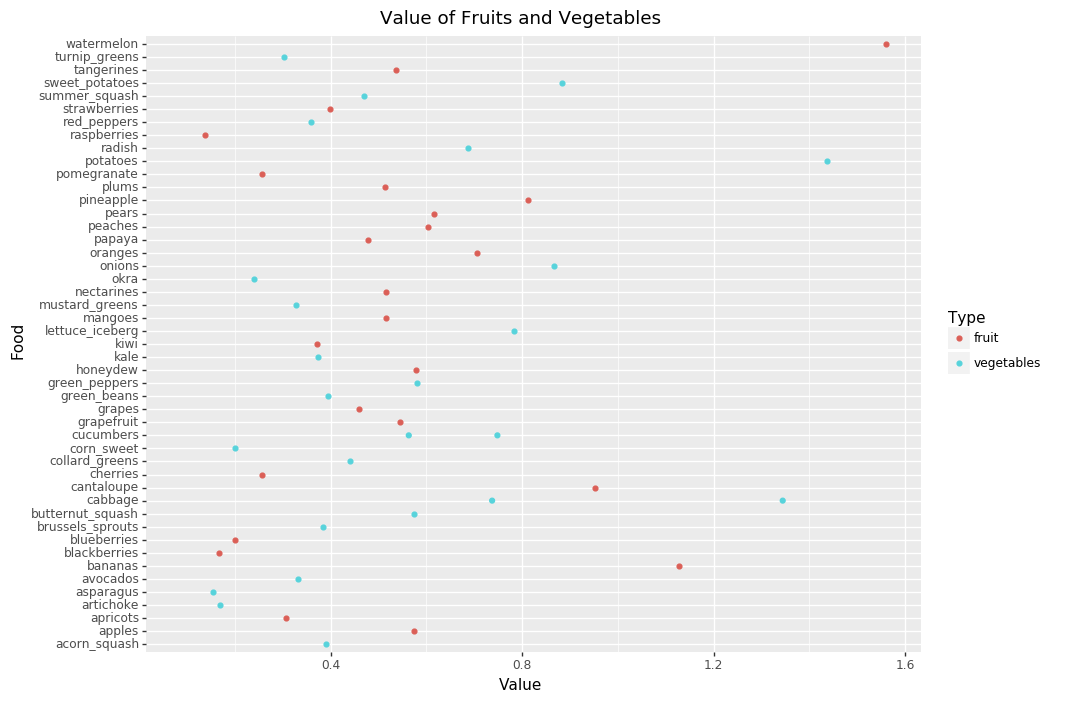

<ggplot: (7545274239)>

In [480]:
#Just being safe and creating a new DataFrame that has the best "value" added in.

fruit_veg2 = fruit_veg.copy()
fruit_veg2["value"] = 1/(fruit_veg2["Price Per Cup"]/fruit_veg2["Pounds Per Cup"])
fruit_veg2.head()

#plotnine boxplot taht compares the value of fruits and vegetables
  
p = gg.ggplot(fruit_veg2, gg.aes(x = "value",y = "Food", color = "Type")) + gg.geom_point(position = gg.position_dodge(width = .1)) #+ gg.coord_flip()
p + gg.theme(figure_size = (10,8)) + gg.labs(title = 'Value of Fruits and Vegetables',x= "Value")

In [481]:
#Seeing which cabbage had the highest value

fruit_veg2[fruit_veg2["Food"] == "cabbage"]

,Type,Food,Form,Price Per Pound,Yield,Pounds Per Cup,Price Per Cup,value
14,vegetables,cabbage,Fresh green cabbage1,0.579208,0.778797,0.330693,0.245944,1.344589
15,vegetables,cabbage,Fresh red cabbage1,1.056450,0.779107,0.330693,0.448412,0.737476


### Which foods are the best value for the price?
To determine the best value for price, I decided to use the inverse of the price per pound adjusted for yield.  In the above dot plot, it can be seen that the fruits with the best value are watermelon and bananas.  The vegetables with the best value are potatoes and green cabbage.  With cabbage in the above graph, there are actually 2 different kinds (Green and Red), so I sorted by "cabbage" to see which one was the one with good value.  

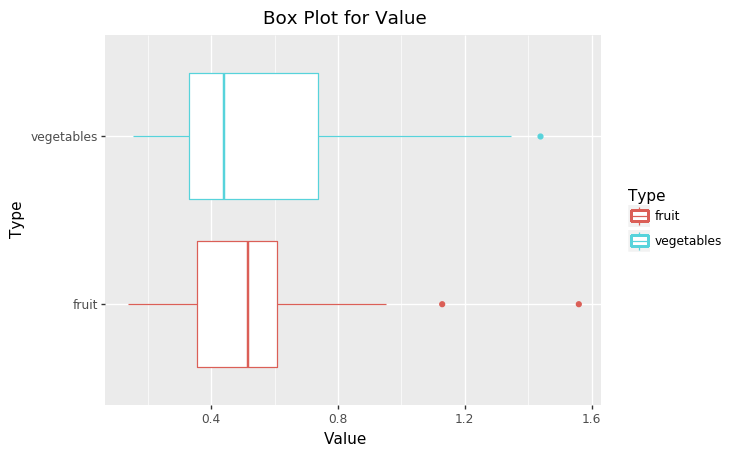

<ggplot: (-9223372029309502320)>

In [482]:
#Boxplot comparing values of vegetabls and fruits as a whole

p = gg.ggplot(fruit_veg2, gg.aes("Type", "value", color = "Type")) + gg.geom_boxplot()
p + gg.labs(title = "Box Plot for Value", x = "Type", y = "Value") + gg.coord_flip()

### What's something surprising about this data set?
There are several things that are interesting about this data set.  Most notably would that aside from a few outliers, the price of fruits and vegetables tends to be fairly similarily distributed.  Just from my own personal experience, I would have thought that fruits would be significantly more expensive than vegetables.  Also looking at the above "Box Plot for Value", we see that there is a higher amount of vegetables that are greater than 1 pound of edible food per dollar in value.  Also fruit aside from the few outlisers tends to have less variance in value than vegetables.  This is suprising, since I expected fruits to vary much more in both price, and value. 

### Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

I would expect cheap foods (in value) that have a high caloric value to be the best combination of price, yield, and nutrition.  For fruits, even though watermelon had the highest value, they tend to not be that calorically dense, but bananas on the other hand are very high in calories and have great value.  Similarly for vegetables, Potatoes not only have great value but are also very high in calories.